# German Credit Risk
# Вариант 4
# Выполнил: Радайкин Артём, ПМ20-4

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import missingno as msno 
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

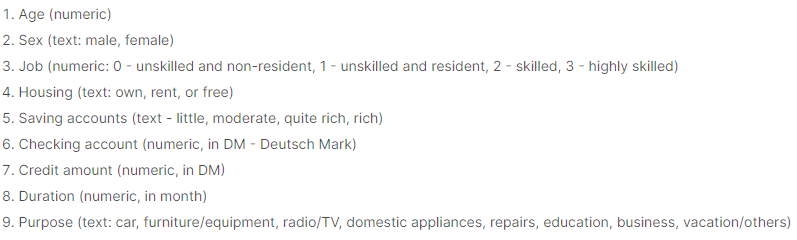

## Считаем данные и проведём EDA аналитику:

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('german_credit_data.csv')
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
df = df.drop(['Unnamed: 0', 'Purpose'], axis=1)

In [ ]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,NaN,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,NaN,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
print("-"*30)
print("Missing values of each column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total rows with missing values / Total number of rows =",(df.shape[0] - df.dropna().shape[0])/len(df))

------------------------------
Missing values of each column
------------------------------
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
dtype: int64
------------------------------
Total rows with missing values / Total number of rows = 0.478


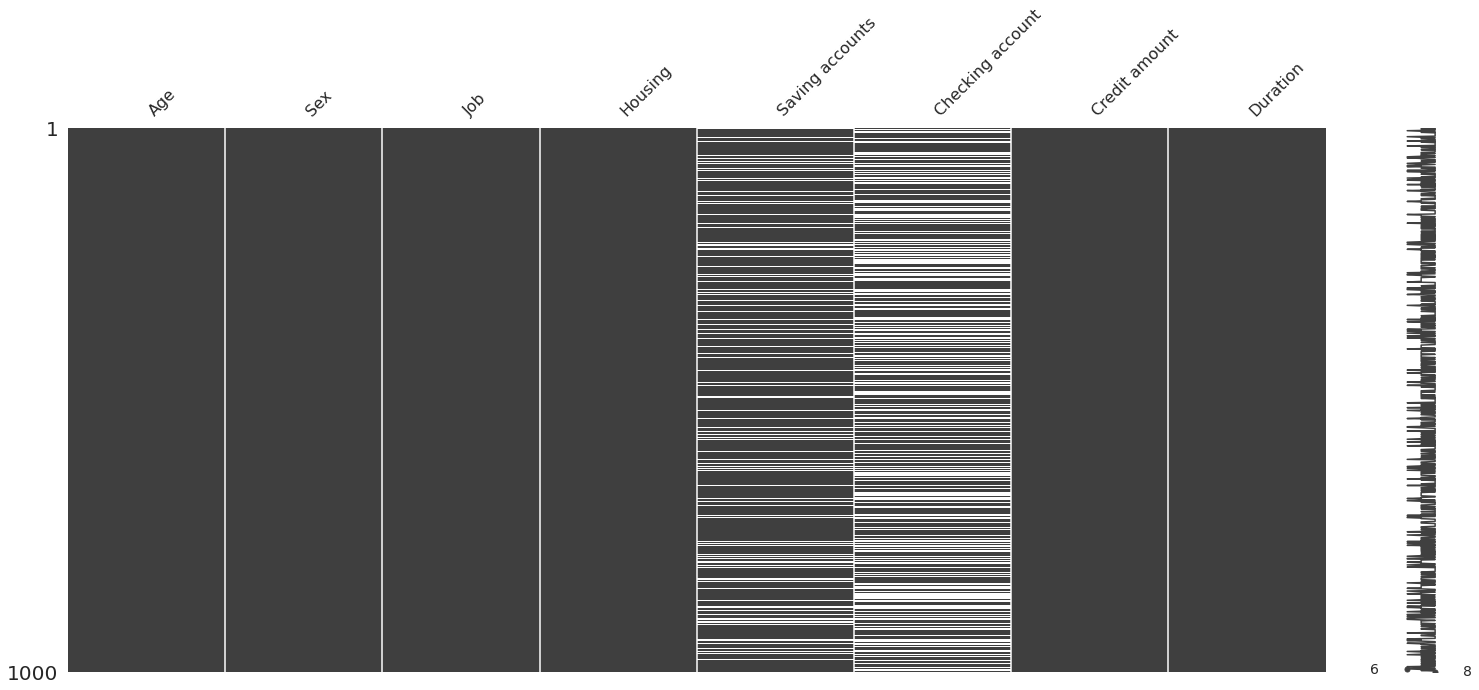

In [ ]:
msno.matrix(df)

## Заменим текстовые категориальные признаки на числовые с помощью функции map. Пустые значения в столбцах заменим на 0.

In [ ]:
df['Saving accounts'] = df['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
df['Checking account'] = df['Checking account'].map({"little":1,"moderate":2,"rich":3 });
df['Saving accounts'] = df['Saving accounts'].fillna(0)
df['Checking account'] = df['Checking account'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Sex               1000 non-null   object 
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   object 
 4   Saving accounts   1000 non-null   float64
 5   Checking account  1000 non-null   float64
 6   Credit amount     1000 non-null   int64  
 7   Duration          1000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,1.190000,1.001000,3271.258000,20.903000
std,11.375469,0.653614,0.966869,0.957034,2822.736876,12.058814
min,19.000000,0.000000,0.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1.000000,0.000000,1365.500000,12.000000
50%,33.000000,2.000000,1.000000,1.000000,2319.500000,18.000000
75%,42.000000,2.000000,1.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,4.000000,3.000000,18424.000000,72.000000


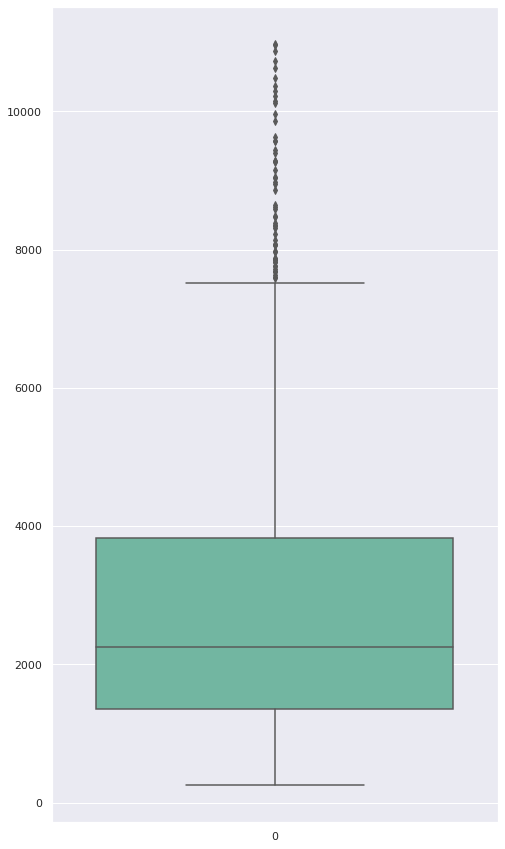

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=df['Credit amount'][df['Credit amount'] < 11000], palette='Set2');

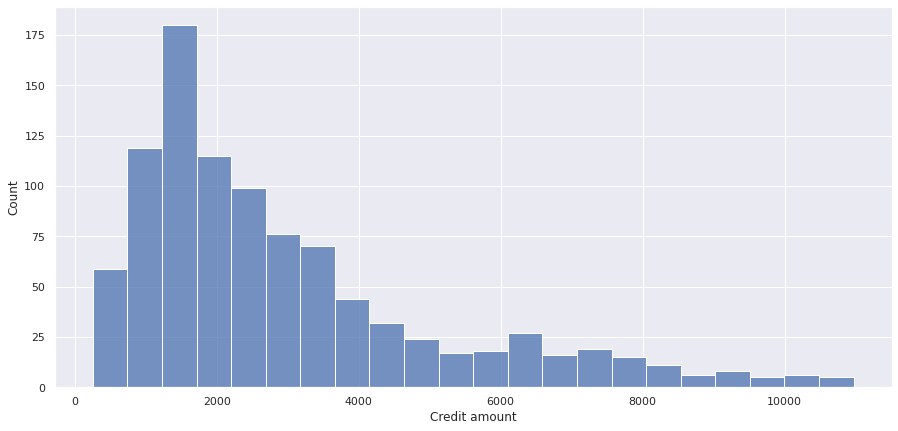

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df['Credit amount'][df['Credit amount'] < 11000]);

In [ ]:
 df = df[df['Credit amount'] < 11000]

In [ ]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,0.0,1.0,1169,6
1,22,female,2,own,1.0,2.0,5951,48
2,49,male,1,own,1.0,0.0,2096,12
3,45,male,2,free,1.0,1.0,7882,42
4,53,male,2,free,1.0,1.0,4870,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               971 non-null    int64  
 1   Sex               971 non-null    object 
 2   Job               971 non-null    int64  
 3   Housing           971 non-null    object 
 4   Saving accounts   971 non-null    float64
 5   Checking account  971 non-null    float64
 6   Credit amount     971 non-null    int64  
 7   Duration          971 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 68.3+ KB


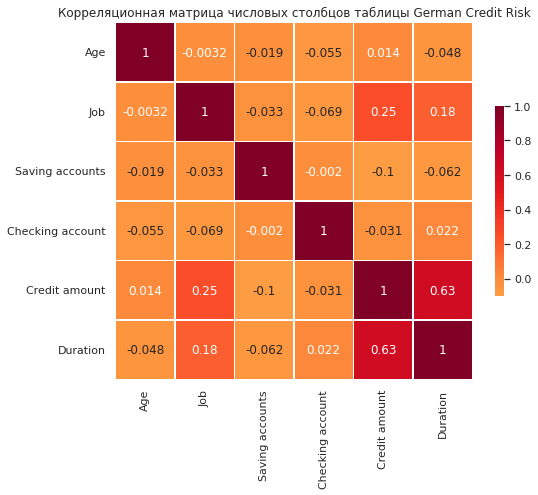

In [ ]:
sns.set_theme(style="white")

corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 7))

sns.heatmap(corr, cmap='YlOrRd', center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})\
            .set_title('Корреляционная матрица числовых столбцов таблицы German Credit Risk');

## Построим модель регрессии для Credit amount. Сделаем вывод об эффективности разных методов.

In [ ]:
X = df.drop('Credit amount', axis=1)
Y = df['Credit amount']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
df_differences = pd.DataFrame(columns=['Тип регресии', 'Признак(и)', 'Тип выборки', 'The R-squared value', 'RMSE', 'MAE', 'MAPE'])
i = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Точность для тестируемых данных
print(f'The R-squared value: {r2_score(y_test, model.predict(X_test))}') 
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')
df_differences.loc[i] = [f'Множественная регрессия', 'Все', 'Train', r2_score(y_train, model.predict(X_train)), 
                           np.sqrt(mean_squared_error(y_train, model.predict(X_train))), mean_absolute_error(y_train, model.predict(X_train)), mean_absolute_percentage_error(y_train, model.predict(X_train))
                          ]
i += 1
df_differences.loc[i] = [f'Множественная регрессия', 'Все', 'Test', r2_score(y_test, model.predict(X_test)), 
                           np.sqrt(mean_squared_error(y_test, model.predict(X_test))), mean_absolute_error(y_test, model.predict(X_test)), mean_absolute_percentage_error(y_test, model.predict(X_test))
                           ]

The R-squared value: 0.4523908417103951
RMSE: 1579.136395647396
MAE: 1201.9675744332517


In [ ]:
model.coef_

array([   6.54671031,  557.21251623, -152.52618703,  -70.03126155,
        114.88251385, -114.94969515,  114.94969515,   74.10999049,
       -182.40711241,  108.29712192])

In [ ]:
model.intercept_

-284.45745441585495

In [ ]:
df_differences

,Тип регресии,Признак(и),Тип выборки,The R-squared value,RMSE,MAE,MAPE
0,Множественная регрессия,Все,Train,0.421941,1706.146320,1284.434963,0.597481
1,Множественная регрессия,Все,Test,0.452391,1579.136396,1201.967574,0.610203


In [ ]:
X = df.drop('Credit amount', axis=1)
X = pd.get_dummies(X)
y = df['Credit amount']

In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

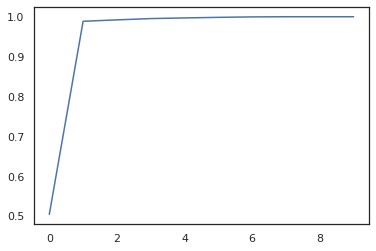

In [ ]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=X_train.shape[1])
X_train_scaled = X_train
pca_test.fit(X_train_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.show()

In [ ]:
def best_params(models_names):
    """models_names = ['name1', 'name2', ...]
    names from LinearRegression, RandomForestRegressor, KNeighborsRegressor, SVR only"""

    d = {}

    for model_name in models_names:
        if model_name == 'LinearRegression':
            lin_reg_parameters = {"fit_intercept": [True, False], 'normalize': [True, False]}
            lin_reg_search = GridSearchCV(LinearRegression(), lin_reg_parameters, cv=5)
            lin_reg_search.fit(X_train, y_train)
            d['LinearRegression'] = lin_reg_search.best_params_
            global lin_reg_search_fitted
            lin_reg_search_fitted = lin_reg_search

        elif model_name == 'RandomForestRegressor':
            rf_reg_parameters = {'n_estimators': range(1, 200), 'max_depth': range(1, 30), 'min_samples_split': range(2, 30), 'min_samples_leaf': range(1, 30)}
            rf_reg_search = RandomizedSearchCV(RandomForestRegressor(), rf_reg_parameters, cv=5, n_jobs=-1, random_state=0)
            rf_reg_search.fit(X_train, y_train)
            d['RandomForestRegressor'] = rf_reg_search.best_params_
            global rf_reg_search_fitted
            rf_reg_search_fitted = rf_reg_search

        elif model_name == 'KNeighborsRegressor':
            kn_reg_parameters = {'n_neighbors': range(3, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': range(1, 40)}
            kn_reg_search = GridSearchCV(KNeighborsRegressor(), kn_reg_parameters, cv=5)
            kn_reg_search.fit(X_test, y_test)            
            d['KNeighborsRegressor'] = kn_reg_search.best_params_
            global kn_reg_search_fitted
            kn_reg_search_fitted = kn_reg_search

        elif model_name == 'SVR':
            svr_reg_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
            svr_reg_search = GridSearchCV(SVR(), svr_reg_parameters, cv=5, n_jobs=-1)
            svr_reg_search.fit(X, y)
            d['SVR'] = svr_reg_search.best_params_
            global svr_reg_search_fitted
            svr_reg_search_fitted = svr_reg_search

    return d

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
best_params(['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor', 'SVR'])

{'LinearRegression': {'fit_intercept': False, 'normalize': True},
 'RandomForestRegressor': {'n_estimators': 177,
  'min_samples_split': 6,
  'min_samples_leaf': 16,
  'max_depth': 21},
 'KNeighborsRegressor': {'algorithm': 'ball_tree',
  'leaf_size': 4,
  'n_neighbors': 9,
  'weights': 'distance'},
 'SVR': {'kernel': 'linear'}}

Best_regression_model:  LinearRegression 
            LinearRegression  RandomForestRegressor  KNeighborsRegressor  \
r2_score:          0.431216               0.374202             0.241356   

                SVR  
r2_score:  0.353742  


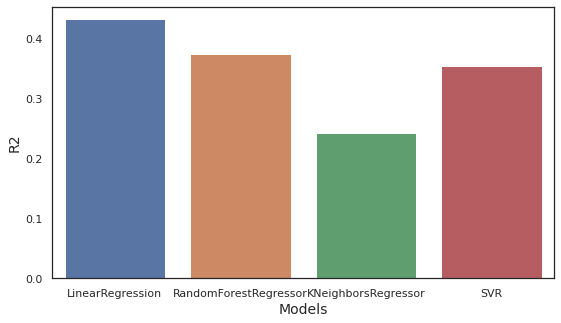

In [ ]:
def best_model(X_train, y_train, X_test, y_test):
    import re
    models = [LinearRegression(fit_intercept=True, normalize=True, n_jobs=-1),
              RandomForestRegressor(n_estimators=65, min_samples_split=13, min_samples_leaf=6, max_depth=10, n_jobs=-1, random_state=0),
              KNeighborsRegressor(algorithm='auto', leaf_size=21, n_neighbors=5, weights='distance', n_jobs=-1),
              SVR(kernel='linear')]
    d = {}
    for model in models:
        model.fit(X_train, y_train)
        model_name = re.match(r'\w+', str(model)).group()
        d[model_name] = r2_score(y_test, model.predict(X_test))
    mdf = pd.DataFrame(d, index=['r2_score:'])
    
    plt.figure(figsize=(9,5))
    bp = sns.barplot(x=mdf.columns, y=mdf.values.flatten())
    bp.set_xlabel("Models", fontsize=14)
    bp.set_ylabel("R2", fontsize=14)

    best_regression_model = mdf.idxmax(axis=1)[0]
    return ('Best_regression_model: ', best_regression_model, '\n', mdf)
    
print(*best_model(X_train, y_train, X_test, y_test))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42)
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
tenP = PolynomialFeatures(degree=10)

X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)
X_10 = tenP.fit_transform(X_train)

#2
regr2 = regr.fit(X_quad, y_train)
y_quad_fit = regr2.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(y_test, y_quad_fit)



regr = LinearRegression()
#3
regr3 = regr.fit(X_cubic, y_train)
y_cubic_fit = regr3.predict(cubic.fit_transform(X_test))
cubic_r2 = r2_score(y_test, y_cubic_fit)


regr = LinearRegression()
#10
regr10 = regr.fit(X_10, y_train)
y_tenP_fit = regr10.predict(tenP.fit_transform(X_test))
tenP_r2 = r2_score(y_test, y_tenP_fit)

In [ ]:
print(f'quadratic_r2: {quadratic_r2}')
print(f'cubic_r2: {cubic_r2}')
print(f'tenP_r2: {tenP_r2}')

quadratic_r2: -1.1624549966173854
cubic_r2: 0.08422932125872729
tenP_r2: -1212137622390.9082
